In [1]:
__nbid__ = '0004'
__author__ = 'Stephanie Juneau <stephanie.juneau@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251205' # yyyymmdd
__datasets__ = ['desi_dr1']  
__keywords__ = ['sparcl', 'spectra', 'database']

# Introducción a la Primera Publicación de Datos (DR1) de DESI en el Astro Data Lab  
## Versión sin el software `desitarget` (kernel Python 3 por omisión)

*Stéphanie Juneau (NOIRLab), Ragadeepika Pucha (U. Utah), Alice Jacques (NOIRLab), Benjamin Weaver (NOIRLab) y el equipo de Astro Data Lab, con contribuciones de Anthony Kremin (LBL), Stephen Bailey (LBL) y la Colaboración DESI*

#### (_[Traducción de 01a_Intro_to_DESI_DR1-Py3.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/DESI/01a_Intro_to_DESI_DR1-Py3.ipynb)_)

### Tabla de Contenido

* [Objetivos y resumen](#goals)
* [Aviso legal y atribuciones](#attribution)
* [Importaciones](#import)
* [Autenticación](#auth)
* [Base de datos de DESI DR1](#desi_dr1)
* [Acceso a los objetos de DESI](#desi_target_access)
    * [Seleccionando objetos según información de selección](#target_info)
    * [Seleccionando objetos en una región del cielo](#hpx_sel)
* [Accediendo y graficando los espectros de un objeto dado](#spectra_access)
* [Objetos con múltiples espectros combinados](#multiple_spectra)
* [Referencias](#ref)

<a class="anchor" id="goals"></a>
# Objetivos

En este notebook exploraremos la Primera Publicación de Datos de DESI (DESI DR1) en el Astro Data Lab. Mostraremos cómo acceder al catálogo de corrimientos al rojo desde la base de datos del Data Lab, cómo clasificar objetos según la información de selección de DESI, cómo acceder a todos los espectros disponibles de un objeto dado usando [SPARCL](https://astrosparcl.datalab.noirlab.edu/sparc/) (SPectra Analysis and Retrievable Catalog Lab), y cómo graficar el espectro “óptimo”. Finalmente, mostraremos cómo consultar objetos que tienen más de un espectro combinado en la survey principal de DESI.

Este notebook es casi idéntico al [notebook](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/DESI/01_Intro_to_DESI_DR1.ipynb) de tutorial original de DESI DR1, pero ha sido modificado para que no sea necesario instalar el software de DESI (`desispec`) para ejecutarlo. Como resultado, puede ejecutarse con un kernel de Python 3 que solo tenga las dependencias de Data Lab y SPARCL (las cuales ya están instaladas en Data Lab).

# Resumen

El Instrumento Espectroscópico de Energía Oscura (DESI, por sus siglas en inglés) es un espectrógrafo multiobjeto con 5000 fibras construido por el Departamento de Energía (DOE). Está instalado en el telescopio Mayall de 4 metros en Kitt Peak, AZ, y se utiliza para llevar a cabo un survey que cubrirá aproximadamente 14,000 grados cuadrados durante 5 años (2021–2026). La Primera Publicación de Datos de DESI (DR1) contiene espectros de 18 millones de objetos únicos observados durante los primeros 13 meses de la survey principal de DESI ("Año 1"). Además, incluye un reprocesamiento de los mismos datos de la etapa de comisionamiento y de validación del survey (SV) que ya se habían incluido en el EDR de DESI. Esto abarca SV1, SV2 y SV3 (la survey del uno por ciento). El nombre de la base de datos que contiene las tablas del catálogo de DESI DR1 es `desi_dr1`. Más información sobre DESI DR1 está disponible tanto en el [sitio web de documentación de datos de DESI](https://data.desi.lbl.gov/doc/) como en la [página de DESI en Astro Data Lab](https://datalab.noirlab.edu/desi/).

En este notebook, mostramos cómo acceder a las diferentes tablas asociadas con esta base de datos para obtener información de selección de objetos y de corrimiento al rojo, y luego utilizar la base de datos espectral SPARCL para recuperar los espectros. Nos centramos en ejemplos basados en la survey principal, pero estos pueden extenderse a los datos de SV consultando las columnas específicas de SV y adaptando el código en consecuencia.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----
# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL (Juneau et al. 2024)}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

For this notebook specifically, please acknowledge:
* DESI data license and acknowledgments: https://data.desi.lbl.gov/doc/acknowledgments/
* Astro Data Lab: https://datalab.noirlab.edu/acknowledgments.php
* SPARCL: https://astrosparcl.datalab.noirlab.edu/sparc/acknowledgments

<a class="anchor" id="import"></a>
# Importaciones

In [1]:
## Importar algunos paquetes útiles de Python
import numpy as np
from getpass import getpass
from astropy.table import Table
from astropy.convolution import convolve, Gaussian1DKernel
import matplotlib 
import matplotlib.pyplot as plt

## Módulos relacionados con Data Lab
from sparcl.client import SparclClient
from dl import queryClient as qc, authClient as ac

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

In [4]:
## Mejorando la apariencia de los gráficos de matplotlib
settings = {
    'font.size':16,
    'axes.linewidth':2.0,
    'xtick.major.size':6.0,
    'xtick.minor.size':4.0,
    'xtick.major.width':2.0,
    'xtick.minor.width':1.5,
    'xtick.direction':'in', 
    'xtick.minor.visible':True,
    'xtick.top':True,
    'ytick.major.size':6.0,
    'ytick.minor.size':4.0,
    'ytick.major.width':2.0,
    'ytick.minor.width':1.5,
    'ytick.direction':'in', 
    'ytick.minor.visible':True,
    'ytick.right':True
}

plt.rcParams.update(**settings)

In [5]:
## Instanciar el cliente de SPARCL
client = SparclClient()

announcement=Data set deprecation warning: SDSS/BOSS DR16 will be replaced with SDSS/BOSS DR17 starting on or after November 1, 2025


<a class="anchor" id="desi_dr1"></a>
# Base de datos de DESI DR1

El esquema de la base de datos `desi_dr1` en Data Lab consiste en varias tablas asociadas con los objetos.

In [6]:
print(qc.schema('desi_dr1'))


Schema: desi_dr1

      Table Name   Description
      ----------   -----------
          agnqso   Value-Added Catalog of DESI DR1 galaxies and quasars with 
                   spectral and infrared classification diagnostics
        exposure   Summary quantities for every DESI exposure
     fiberassign   Quantities obtained when a DESI target is assigned to a fiber
           frame   Summary quantities for each petal of the DESI instrument i
                   n a given exposure; in normal operation there are ten fram
                   es for every exposure
      photometry   Photometric quantities from LS DR9 for every TARGETID
       potential   For a given tile, this table lists all targets that could 
                   have received a fiber assignment
          target   The quantities obtained when photometric objects are analy
                   zed in the target selection process
            tile   Summary quantities for every DESI tile (pointing on the sky)
x1p5__zpix__allwi

Nos centraremos en la tabla `zpix` en este notebook. Este es el catálogo principal de corrimientos al rojo de la survey DESI. Contiene la información de redshift proveniente de los espectros combinados, basada en el healpix de los objetos. También incluye la información de selección de los distintos objetos.

A continuación, veremos las columnas disponibles en esta tabla.

In [7]:
## Columnas en la tabla zpix
print(qc.schema('desi_dr1.zpix'))


Schema: desi_dr1
 Table: zpix

     Column Name   Description
     -----------   -----------
               z   Redshift measured by Redrock
            zerr   Redshift error from Redrock
            chi2   Best fit chi squared
         coeff_0   Redrock template coefficients
         coeff_1   Redrock template coefficients
         coeff_2   Redrock template coefficients
         coeff_3   Redrock template coefficients
         coeff_4   Redrock template coefficients
         coeff_5   Redrock template coefficients
         coeff_6   Redrock template coefficients
         coeff_7   Redrock template coefficients
         coeff_8   Redrock template coefficients
         coeff_9   Redrock template coefficients
       deltachi2   Delta-chi-squared for template fit from Redrock
   mean_fiber_ra   Mean (over exposures) RA of actual fiber position
  mean_fiber_dec   Mean (over exposures) DEC of actual fiber position
            elon   Ecliptic longitude
            elat   Ecliptic latitude


<a class="anchor" id="desi_target_access"></a>
# Accediendo a los objetos de DESI

Los espectros de DESI están identificados de forma única por tres cantidades:

* **targetid**: identificador único para un objeto dado  
* **survey**: SURVEY en el que se observó el objeto. Puede ser _cmx_, _special_, _sv1_, _sv2_ o _sv3_.  
* **program**: PROGRAMA DE ASIGNACIÓN DE FIBRA. Representa las condiciones de observación planificadas para el objeto. Puede ser _dark_, _bright_ o _backup_. En el caso de _cmx_ y _sv1_, también existe la opción _other_.

Los diferentes espectros de un mismo objeto se combinan (“coadd”) dentro de cada survey y programa. Por lo tanto, algunos objetos pueden tener múltiples espectros combinados, y cada uno está asociado con un determinado `targetid`, `survey` y `program`. El espectro “óptimo” para un objeto dado se indica en la columna `zcat_primary`. Más información sobre el modelo de datos de los catálogos de redshift está disponible [aquí](https://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_REDUX/SPECPROD/zcatalog/zpix-SURVEY-PROGRAM.html#).

Para esta consulta, seleccionaremos datos de la survey principal (`survey='main'`). Como la tabla `zpix` es grande (con 23 millones de filas), obtendremos solo un 10% distribuidos aleatoriamente en el cielo, aplicando un corte en `random_id` (ID aleatorio en el rango de 0.0 a 100.0).

In [8]:
# Escribir una consulta para seleccionar el espectro primario en el survey principal para el 10% de la muestra
# (ver información detallada más abajo)
query = """
        SELECT zp.targetid, zp.survey, zp.program, zp.desi_target, 
               zp.mean_fiber_ra, zp.mean_fiber_dec, 
               zp.z, zp.zwarn, zp.spectype
        FROM desi_dr1.zpix AS zp
        WHERE (zp.survey='main') AND zp.main_primary AND (zp.random_id BETWEEN 0. AND 10.)
        """ 

## Información sobre la consulta
##
## Columnas seleccionadas --
##   targetid, survey, program — identificadores únicos para un espectro dado  
##   desi_target — codifica la información de selección de objetos de el survey principal (explicado en detalle más abajo)  
##   mean_fiber_ra, mean_fiber_dec — coordenadas donde se colocó la fibra  
##   z — corrimiento al rojo espectroscópico del objeto  
##   zwarn — información codificada sobre el redshift (zwarn = 0 es bueno)  
##   spectype — tipo espectral del objeto: STAR | GALAXY | QSO  
## Restricciones (cláusula WHERE) --
##   survey: selecciona solo la survey principal  
##   main_primary: conserva solo el mejor espectro en la survey principal (elimina posibles duplicados)  
##   random_id: selecciona una fracción del 10% de la muestra (valores de 0 a 10 en una escala de 0 a 100)

In [8]:
print(query)


        SELECT zp.targetid, zp.survey, zp.program, zp.desi_target, 
               zp.mean_fiber_ra, zp.mean_fiber_dec, 
               zp.z, zp.zwarn, zp.spectype
        FROM desi_dr1.zpix AS zp
        WHERE (zp.survey='main') AND zp.main_primary AND (zp.random_id BETWEEN 0. AND 10.)
        


In [9]:
zpix_cat = qc.query(sql = query, fmt = 'table')

In [10]:
print(f"La tabla resultante tiene {len(zpix_cat)} filas, y representa el 10% del tamaño de la muestra")
zpix_cat[0:5]

La tabla resultante tiene 2063506 filas, y representa el 10% del tamaño de la muestra


targetid,survey,program,desi_target,mean_fiber_ra,mean_fiber_dec,z,zwarn,spectype
int64,str4,str6,int64,float64,float64,float64,int64,str6
39628129664239940,main,dark,65537,234.7166322469532,14.27766943485698,0.6129316573380434,0,GALAXY
39627660451645263,main,dark,917542,146.505791478883,-5.361541128676229,2.274544489801376,0,QSO
39632981819656750,main,dark,1028,250.8452391416031,34.96682360092108,3.026060340852765,0,QSO
39628310233219875,main,dark,65537,36.75448828509968,22.26330131482691,0.5896048730671053,0,GALAXY
39627715627715582,main,dark,655394,201.3880181513268,-2.939781972005333,1.541882595749106,0,GALAXY


In [11]:
# Verificar que las filas tengan TARGETIDs únicos (solo un espectro PRIMARIO por objeto)
Ntot = len(zpix_cat)
print(f"N° total de filas: {Ntot}")
print(f"N° de filas con TARGETIDs únicos: {len(np.unique(zpix_cat['targetid']))}")

N° total de filas: 2063506
N° de filas con TARGETIDs únicos: 2063506


In [12]:
## Verificar los tipos espectrales
spectypes = np.unique(zpix_cat['spectype'])

for spectype in spectypes:
    Nspectype = len(zpix_cat[zpix_cat['spectype']==spectype])
    # Porcentaje redondeado a 1 decimal
    percent = np.round(Nspectype/Ntot*100, 1)
    print(f"SPECTYPE={spectype} incluye N={Nspectype} ({percent}%)")

SPECTYPE=GALAXY incluye N=1479652 (71.7%)
SPECTYPE=QSO incluye N=165098 (8.0%)
SPECTYPE=STAR incluye N=418756 (20.3%)


<a class="anchor" id="target_info"></a>
## Seleccionando objetos según información de selección

Los objetos de DESI se dividen en cinco clases principales:
* MWS: Milky Way Survey — Este survey estudia estrellas en la Vía Láctea.  
* BGS: Bright Galaxy Survey — Este survey estudia galaxias brillantes en el universo cercano.  
* LRG: Luminous Red Galaxies  
* ELG: Emission Line Galaxies  
* QSO: Quasares

[Myers et al. 2023](https://ui.adsabs.harvard.edu/abs/2023AJ....165...50M/abstract) describen con más detalle el proceso de selección de objetos y la información asociada. Además de estas clases principales, también existen objetos secundarios asignados a fibras, basados en distintos programas secundarios dentro de DESI (objetos SCND).

Las columnas `*DESI_TARGET` codifican la información sobre a qué clase pertenece el objeto. Cabe destacar que algunas fuentes pueden pertenecer a más de una clase.

En esta sección mostramos cómo seleccionar objetos según su información de selección.

La información sobre los distintos bits de selección de objetos está disponible [aquí](https://desidatamodel.readthedocs.io/en/latest/bitmasks.html#target-masks). Al utilizar directamente los bits de selección, evitamos depender de las máscaras de selección que provienen del software de DESI.

In [13]:
## Función para verificar los bits

def check_bits(table, bit):
    """
    Función para verificar los bits correspondientes a las clases principales de objetos.

    Parámetros
    ----------
    table : tabla de astropy
        Tabla de objetos de DESI con las columnas necesarias desi_target
        (el código y la tabla se pueden modificar para incluir también sv*_desi_target)
        
    bit : int
        Bit de objeto de DESI

    Retorna
    -------
    res : arreglo de numpy
        Arreglo booleano correspondiente al bit
    """
    # La información de selección de objetos de DESI está almacenada en las distintas columnas desi_target
    desi_tgt = table['desi_target']

    # Si se modifica el notebook para usar los datos de SV, hay que consultar las columnas sv*_desi_target
    # y descomentar el código a continuación
#    sv1_desi_tgt = table['sv1_desi_target']
#    sv2_desi_tgt = table['sv2_desi_target']
#    sv3_desi_tgt = table['sv3_desi_target']
        
    val = (2**bit)

    # Aplicar la selección
    res = desi_tgt & val != 0

    # Versión para datos de SV y Main (si el notebook se modifica en consecuencia)
#    res = (desi_tgt & val != 0)|(sv1_desi_tgt & val != 0)|(sv2_desi_tgt & val != 0)|(sv3_desi_tgt & val != 0)

    return (res)


In [14]:
## Selección de candidatos - 
## Bits de objetos de DESI:
## 1. BGS: bit 60
## 2. LRG: bit 0
## 3. ELG: bit 1
## 4. QSO: bit 2
## 5. MWS: bit 61
## 6. Objetos secundarios: bit 62

is_bgs = check_bits(zpix_cat, 60)
is_lrg = check_bits(zpix_cat, 0)
is_elg = check_bits(zpix_cat, 1)
is_qso = check_bits(zpix_cat, 2)
is_mws = check_bits(zpix_cat, 61)
is_scnd = check_bits(zpix_cat, 62)

In [15]:
# Número de objetos de cada tipo
n_bgs = len(zpix_cat[is_bgs])
n_lrg = len(zpix_cat[is_lrg])
n_elg = len(zpix_cat[is_elg])
n_qso = len(zpix_cat[is_qso])
n_mws = len(zpix_cat[is_mws])
n_scnd = len(zpix_cat[is_scnd])

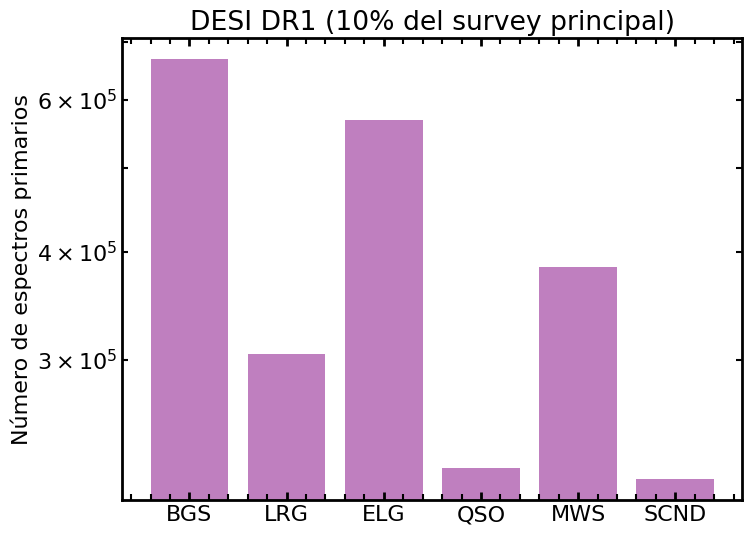

In [16]:
# Veamos los números de forma visual -

plt.figure(figsize = (8,6))

targets = ['BGS', 'LRG', 'ELG', 'QSO', 'MWS', 'SCND']
numbers = [n_bgs, n_lrg, n_elg, n_qso, n_mws, n_scnd]

plt.bar(targets, numbers, color = 'purple', alpha = 0.5)
plt.ylabel('Número de espectros primarios')
plt.yscale('log')
plt.title('DESI DR1 (10% del survey principal)');

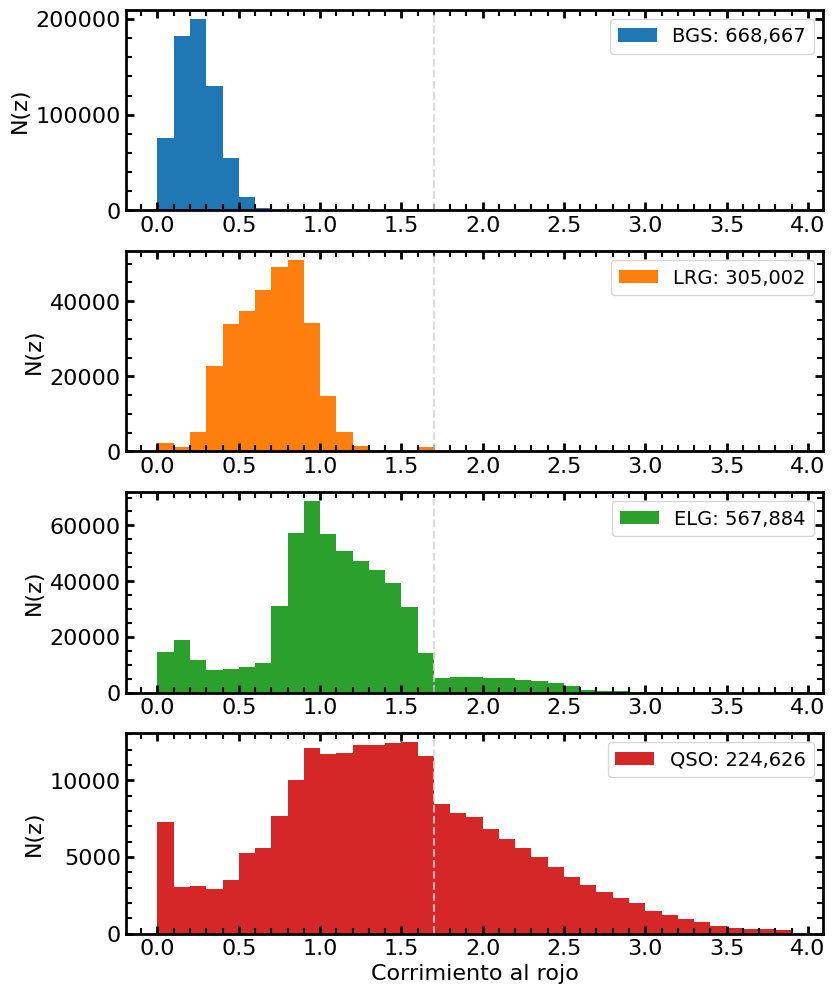

In [17]:
# Ahora veamos la distribución de corrimientos al rojo -

fig, axs = plt.subplots(4, 1, figsize = (9, 12))

# Definir los bins de redshift para los histogramas
bins = np.arange(0, 4, 0.1)

# Vamos a iterar sobre estas 4 clases de objetos
targets = [is_bgs, is_lrg, is_elg, is_qso]
colors = ['C0', 'C1', 'C2', 'C3']
labels = [f'BGS: {n_bgs:,}', f'LRG: {n_lrg:,}', f'ELG: {n_elg:,}', f'QSO: {n_qso:,}']

for i, target in enumerate(targets):
    axs[i].hist(zpix_cat['z'][target], color=colors[i], bins=bins, label=labels[i])
    axs[i].legend(fontsize=14)
    axs[i].set_ylabel("N(z)")

    # Línea vertical en el límite para el tipo GALAXY
    axs[i].axvline(1.7, ls='--', color='lightgrey', alpha=0.8)

# Etiqueta del eje x en el último panel
axs[3].set_xlabel("Corrimiento al rojo");

### Otras máscaras

Las columnas `DESI_TARGET` contienen la información de selección de más alto nivel en DESI. Sin embargo, existen subclases de objetos. <br/>
Por ejemplo, BGS tiene diferentes máscaras de selección según el criterio utilizado. Cada una de las diferentes propuestas de objetos secundarios tiene sus propias máscaras. Se pueden seleccionar de forma similar a lo anterior, pero usando las columnas correspondientes (como `BGS_TARGET` o `SCND_TARGET`). Más información sobre las máscaras de bits en DESI está disponible [aquí](https://desidatamodel.readthedocs.io/en/latest/bitmasks.html).

<a class="anchor" id="hpx_sel"></a>
## Selección de objetos en una región del cielo

Aquí mostramos cómo consultar objetos únicos de DESI DR1 en una región determinada del cielo.

También seleccionamos y sobreponemos los objetos del `Milky Way Survey` en esta región.

In [18]:
hpx = 26279      

## Escribir consulta para seleccionar este healpix específico (información detallada abajo)
query = f'''SELECT zp.targetid, zp.survey, zp.program, zp.desi_target,
                   zp.z, zp.zwarn, zp.spectype, 
                   zp.mean_fiber_ra, zp.mean_fiber_dec 
            FROM desi_dr1.zpix AS zp
            WHERE (healpix={hpx} AND survey='main' AND main_primary)'''

## Información sobre la consulta
## 
## Columnas seleccionadas:
##   targetid, survey, program -- identificadores únicos para un espectro dado
##   desi_target -- codifica la información de selección del survey principal
##   z -- corrimiento al rojo espectroscópico del objeto
##   zwarn -- información codificada sobre la calidad del redshift (zwarn = 0 es confiable)
##   spectype -- Tipo espectral del objeto: STAR | GALAXY | QSO
##   mean_fiber_ra, mean_fiber_dec -- coordenadas donde se colocó la fibra
## Restricciones (cláusula WHERE):
##   healpix: selecciona uno específico
##   survey: conserva solo el survey principal (Main)
##   main_primary: conserva el mejor espectro del survey principal (en caso de duplicados)

In [19]:
print(query)

SELECT zp.targetid, zp.survey, zp.program, zp.desi_target,
                   zp.z, zp.zwarn, zp.spectype, 
                   zp.mean_fiber_ra, zp.mean_fiber_dec 
            FROM desi_dr1.zpix AS zp
            WHERE (healpix=26279 AND survey='main' AND main_primary)


In [20]:
tsel = qc.query(sql = query, fmt = 'table')

In [21]:
## MWS bit - 61
is_mws = check_bits(tsel, 61)

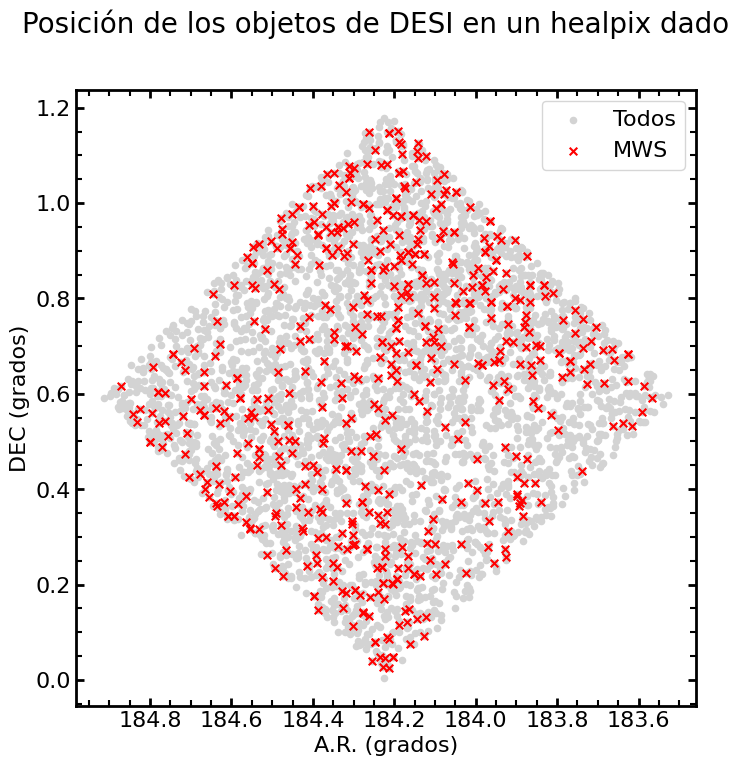

In [22]:
plt.figure(figsize = (8, 8))

plt.suptitle('Posición de los objetos de DESI en un healpix dado', fontsize = 20)
plt.scatter(tsel['mean_fiber_ra'], tsel['mean_fiber_dec'], color = 'lightgrey', s = 20, label = 'Todos')
plt.scatter(tsel['mean_fiber_ra'][is_mws], tsel['mean_fiber_dec'][is_mws], color = 'r', s = 30, marker = 'x', label = 'MWS')
plt.xlabel('A.R. (grados)')
plt.ylabel('DEC (grados)')
## La ascensión recta (RA) aumenta hacia la izquierda (Este)
plt.gca().invert_xaxis()
plt.legend();

<a class="anchor" id="spectra_access"></a>
# Acceso y representación gráfica de los espectros de un objeto dado

Finalmente, mostramos cómo acceder a todos los espectros disponibles, añadidos mediante healpix, de un objeto dado. También mostramos cómo seleccionar el mejor espectro.
Utilizamos SPARCL, un servicio rápido de acceso espectral en Data Lab.
En este [notebook tutorial](https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/SPARCL/How_to_use_SPARCL.ipynb) encontrará información detallada sobre el uso de SPARCL.

In [23]:
## Seleccionar objetos con nspec > 5
query = '''SELECT targetid, survey, program, z, zwarn, coadd_fiberstatus, 
                  zcat_primary, zcat_nspec, tsnr2_lrg
           FROM desi_dr1.zpix
           WHERE zcat_nspec>5
        '''

tsel = qc.query(sql=query, fmt='table')

In [24]:
len(tsel)

782

In [24]:
## Seleccionar un objeto aleatoriamente
## Se puede probar cualquier objeto con ii = 0 a 307

ii = 50
targetid = int(tsel['targetid'].data[ii])   ## SPARCL solo acepta enteros de Python

## Guardar una tabla con las filas que comparten el mismo targetid que el seleccionado
tsel_id = tsel[tsel['targetid']==tsel['targetid'][ii]]

In [25]:
## Recuperar espectros

inc = ['specid', 'redshift', 'flux', 'wavelength', 'spectype', 'specprimary', 'survey', 'program', 'targetid', 'redshift_warning']
res = client.retrieve_by_specid(specid_list = [targetid],
                                include = inc,
                                dataset_list = ['DESI-DR1'])

In [26]:
## Comprobar que se han recuperado todos los espectros

print ('Número de espectros añadidos: ', tsel['zcat_nspec'].data[ii])
print ('Número de registros recuperados: ', len(res.records))

Número de espectros añadidos:  6
Número de registros recuperados:  6


In [27]:
res

Retrieved Results: 6 records

In [28]:
records = res.records

## Seleccionar el espectro principal
spec_primary = np.array([records[jj].specprimary for jj in range(len(records))])

primary_ii = np.where(spec_primary == True)[0][0]

In [29]:
lam_primary = records[primary_ii].wavelength
flam_primary = records[primary_ii].flux

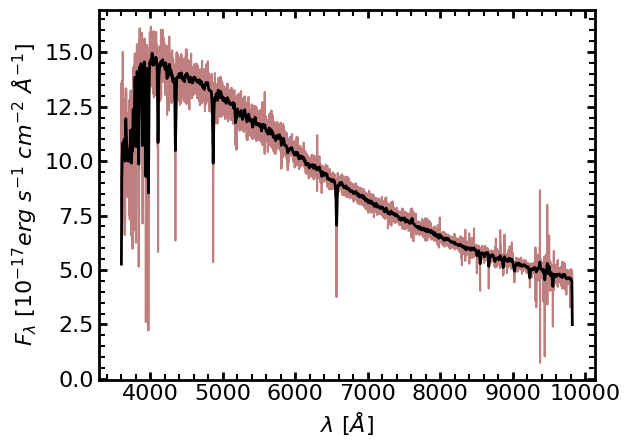

In [30]:
# Graficar el espectro original en color vinotinto

plt.plot(lam_primary, flam_primary, color = 'maroon', alpha = 0.5)

# Graficar encima el espectro suavizado en negro

plt.plot(lam_primary, convolve(flam_primary, Gaussian1DKernel(5)), color = 'k', lw = 2.0)
plt.xlabel(r'$\lambda$ [$\AA$]')
plt.ylabel(r'$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()

Grafiquemos ahora todos los espectros disponibles para este objeto.

En cada caso, los indicadores `survey`, `program`, `primary` y `zwarn` están etiquetados con el espectro correspondiente.

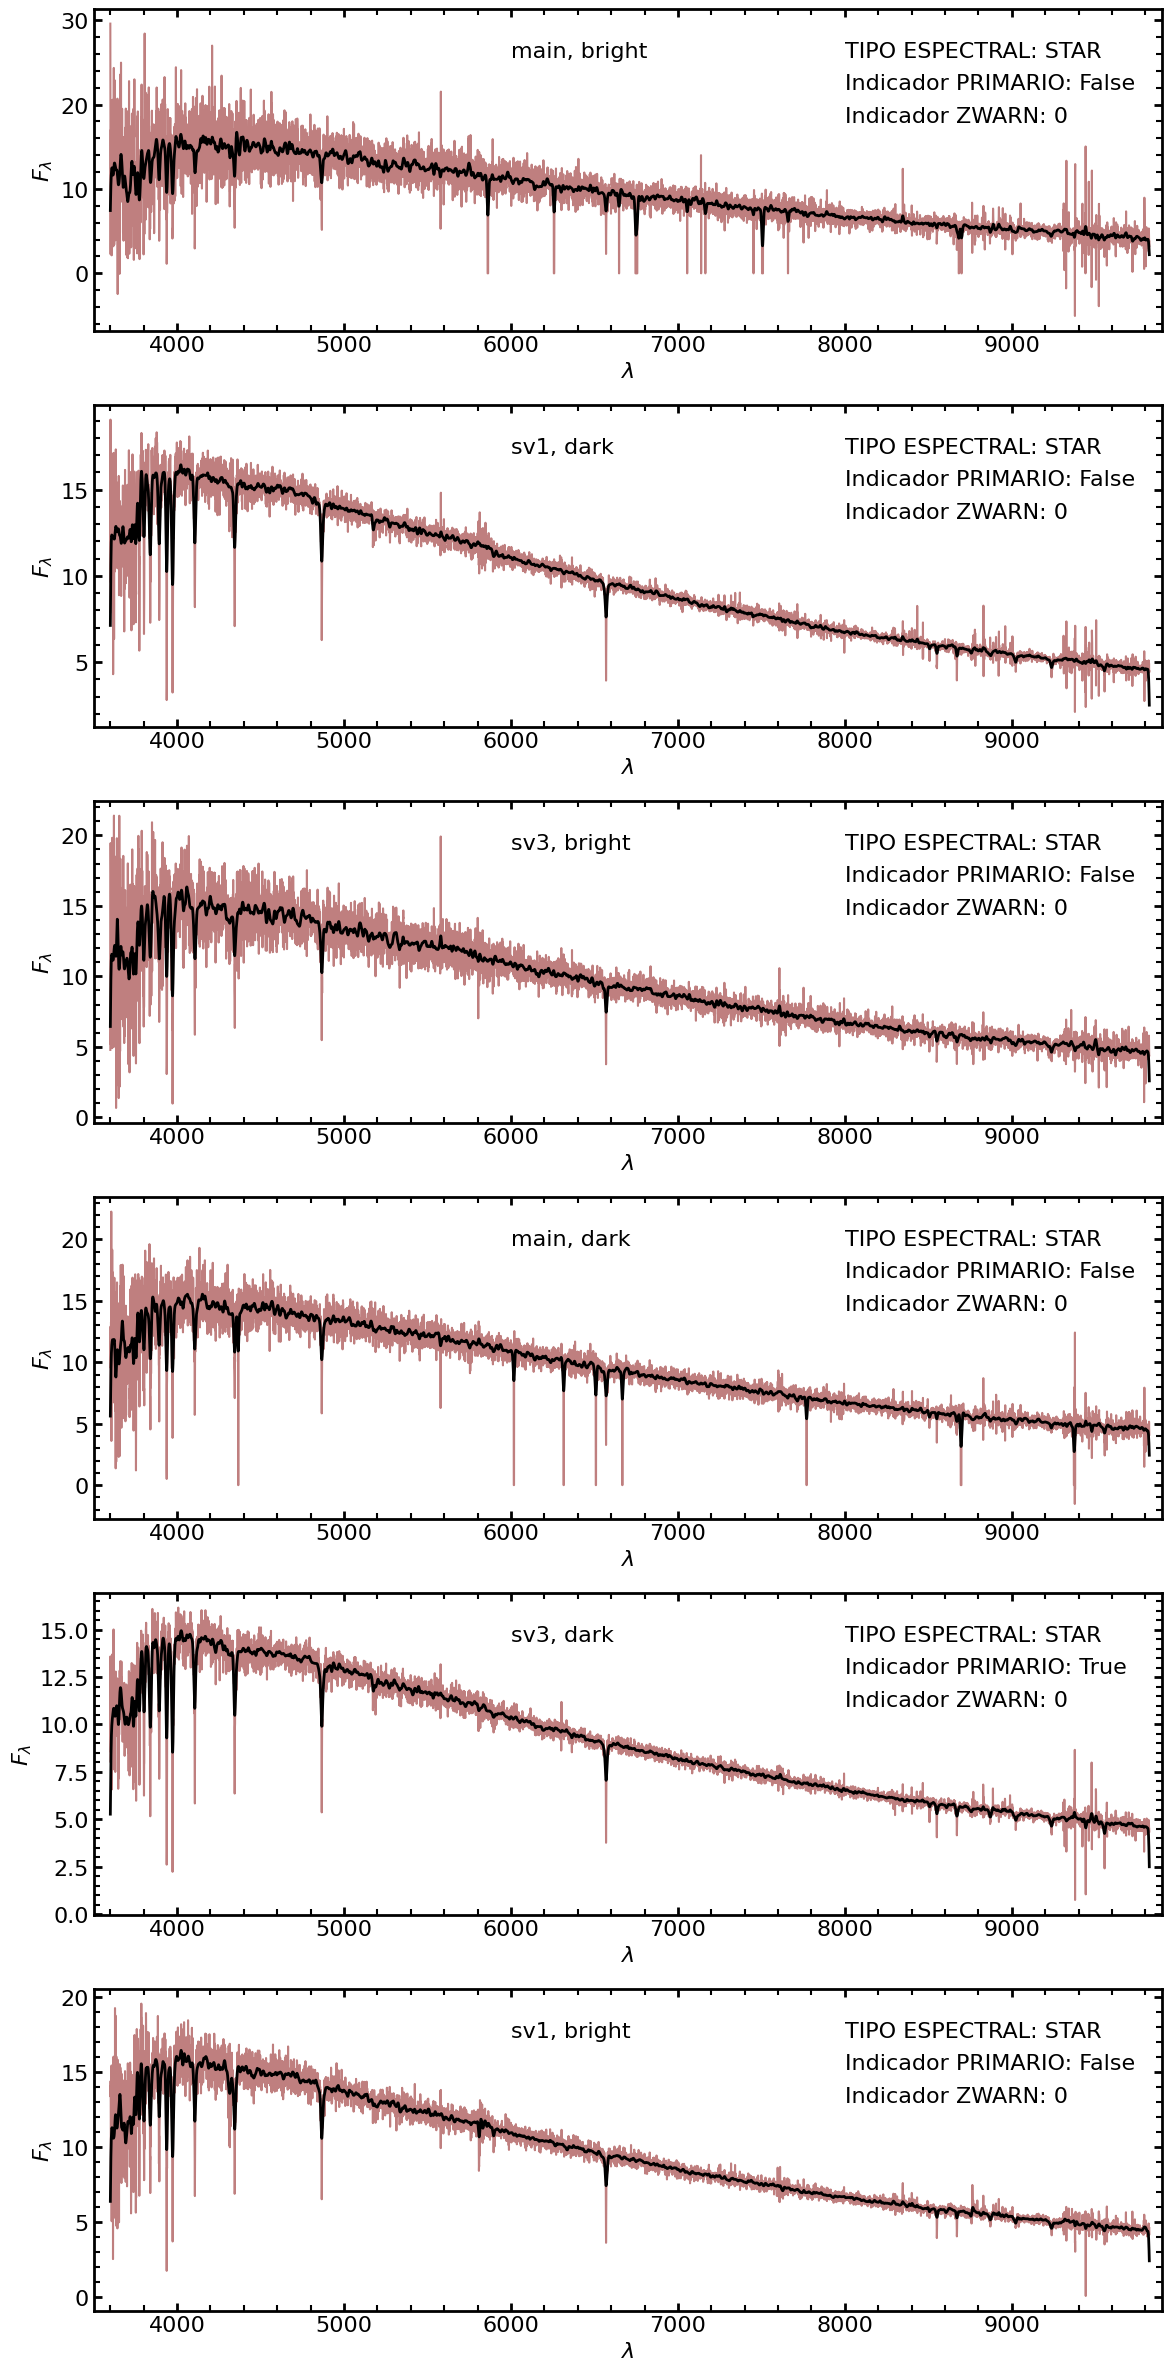

In [31]:
# Número de espectros 
n = len(records)

fig, ax = plt.subplots(n, 1, figsize = (12,(4*n)))

for jj in range(n):
    survey = records[jj].survey
    program = records[jj].program
    spectype = records[jj].spectype
    primary_flag = records[jj].specprimary
    zwarn_flag = records[jj].redshift_warning

    lam = records[jj].wavelength
    flam = records[jj].flux
    
    #Graficar el espectro combinado en vinotinto
    ax[jj].plot(lam, flam, color = 'maroon', alpha = 0.5)
    # Graficar encima el espectro suavizado en negro 
    ax[jj].plot(lam, convolve(flam, Gaussian1DKernel(5)), color = 'k', lw = 2.0)
    ax[jj].set(xlim = [3500, 9900], xlabel = r'$\lambda$', ylabel = r'$F_{\lambda}$')
    trans = ax[jj].get_xaxis_transform()
    ax[jj].annotate(f'{survey}, {program}', xy = (6000, 0.85), xycoords = trans, fontsize = 16)
    ax[jj].annotate(f'TIPO ESPECTRAL: {spectype}', xy = (8000, 0.85), xycoords = trans, fontsize = 16)
    ax[jj].annotate(f'Indicador PRIMARIO: {primary_flag}', xy = (8000, 0.75), xycoords = trans, fontsize = 16)
    ax[jj].annotate(f'Indicador ZWARN: {zwarn_flag}', xy = (8000, 0.65), xycoords = trans, fontsize = 16)    

    plt.tight_layout()

En el gráfico anterior, podemos observar que el espectro con el indicador PRIMARY = True es el que presenta la mayor relación señal-ruido. Los demás espectros disponibles tienden a variar en calidad, incluyendo algunos con más ruido que el espectro "mejor".
Imprimamos la tabla de valores de sus indicadores de calidad, incluyendo ZWARN y COADD_FIBERSTATUS, para ver si alguno presenta problemas. **Nota**: En algunos casos, si no hay datos válidos disponibles, el espectro aparece en blanco con `ZWARN>0`.

In [32]:
tsel_id['targetid','survey','program','zwarn','coadd_fiberstatus','tsnr2_lrg','zcat_primary']

targetid,survey,program,zwarn,coadd_fiberstatus,tsnr2_lrg,zcat_primary
int64,str7,str6,int64,int64,float64,str1
39627751560317946,sv3,dark,0,0,358.0292,t
39627751560317946,main,bright,0,0,14.342091,f
39627751560317946,sv3,bright,0,0,47.464897,f
39627751560317946,sv1,bright,0,0,173.92639,f
39627751560317946,sv1,dark,0,0,329.90457,f
39627751560317946,main,dark,0,0,84.216095,f


**Notas:**
- `zwarn` contiene posibles advertencias o errores de ajuste al corrimiento al rojo ([lista de definiciones de bits](https://desidatamodel.readthedocs.io/en/latest/bitmasks.html#zwarn-bit-definitions)). - `coadd_fiberstatus` contiene información sobre las condiciones de la fibra durante las observaciones.

- Cuando todos los espectros tienen `zwarn=0`, el mejor se selecciona según el valor de `tsnr2_lrg`, que representa la profundidad alcanzada (relación señal-ruido) del espectro.

Si vuelve a examinar los espectros anteriores, podrá observar que los más visibles (con menos ruido) tienen valores más altos de `tsnr2_lrg`. Por ejemplo, los espectros en tiempo oscuro alcanzan una señal más alta que los de tiempo brillante.

<a class="anchor" id="multiple_spectra"></a>
## Objetos con múltiples espectros coañadidos

In [33]:
## Escriba una consulta para seleccionar todos los objetos principales 
## con un espectro N>1 (información detallada a continuación).

q_multi = """
        SELECT targetid, survey, program, desi_target, 
               z, zwarn, coadd_fiberstatus, spectype, 
               CAST(main_primary AS int), main_nspec
        FROM desi_dr1.zpix
        WHERE (survey='main') AND (main_nspec>1)
        """

## Información sobre la consulta
##
## Columnas seleccionadas:
##   targetid, survey, program: identificadores únicos para un espectro dado
##   desi_target: codifica la información de destino de la survey principal (se detalla a continuación)
##   z: corrimiento al rojo espectroscópico del objetivo
##   zwarn: información codificada sobre el corrimiento al rojo (zwarn = 0 es correcto)
##   coadd_fiberstatus: información codificada sobre la fibra asignada al objetivo (coadd_fiberstatus = 0 es correcto)
##   spectype: tipo espectral del objetivo: STAR | GALAXY | QSO
##   main_nspec: número de espectros coañadidos disponibles para un objetivo dado
##   main_primary: si un espectro coañadido dado es el espectro primario. ZCAT_PRIMARY = Verdadero para el mejor espectro.
##   Convirtiendo esta columna en un entero: ZCAT_PRIMARY = 1 para el mejor espectro.
## Restricciones (instrucción WHERE) --
##   survey: seleccionar solo la survey principal
##   main_nspec: mantener objetos con más de un espectro de survey principal
##   (p. ej., se observaron en los programas DARK y BRIGHT)

In [34]:
zmulti = qc.query(sql = q_multi, fmt = 'table')

In [35]:
print(f"La tabla resultante tiene {len(zmulti)} filas")
zmulti[0:5]

La tabla resultante tiene 508470 filas


targetid,survey,program,desi_target,z,zwarn,coadd_fiberstatus,spectype,main_primary,main_nspec
int64,str4,str6,int64,float64,int64,int64,str6,int64,int64
39633221406692395,main,bright,2305843009213694980,0.9276516309963582,0,0,QSO,0,2
39633221406692395,main,dark,2305843009213694980,0.9276960025538751,0,0,QSO,1,2
39633225433219765,main,bright,1152921504606847233,0.3977524124527504,0,0,GALAXY,0,2
39633225433219765,main,dark,1152921504606847233,0.3979740015739428,0,0,GALAXY,1,2
39633217363383452,main,bright,2305843017803628544,-0.0006240696655950223,0,0,STAR,0,2


In [36]:
is_primary = zmulti['main_primary']==1

print(f"N(rows) with MAIN_PRIMARY=True : {len(zmulti[is_primary])}")
print(f"N(rows) with MAIN_PRIMARY=False: {len(zmulti[~is_primary])}")

N(rows) with MAIN_PRIMARY=True : 254235
N(rows) with MAIN_PRIMARY=False: 254235


In [37]:
## Verificar cuántos por programa (y la fracción que son espectros "Primario" = "Mejor")
programs = np.unique(zmulti['program'])
programs

for program in programs:
    is_prog = zmulti['program']==program
    is_mult = zmulti['main_nspec']>1
    N_prog = len(zmulti[is_prog])
    N_multiple = len(zmulti[is_prog&is_mult])
    N_primary = len(zmulti[is_prog&is_mult&is_primary])
    percent = np.round(N_primary/N_multiple*100, 1)

    print(f"Programa={program}")
    print(f"  {N_multiple} tienen espectro >1; {N_primary} ({percent}%) son los primarios")

Programa=bright
  254235 tienen espectro >1; 3826 (1.5%) son los primarios
Programa=dark
  254235 tienen espectro >1; 250409 (98.5%) son los primarios


**Nota**: Como era de esperar, los espectros de tiempo oscuro tienden a tener mayor calidad que los de tiempo brillante, por lo que suelen ser los preferidos como el "mejor" espectro primario.

**Ejercicio**: Se podría profundizar para averiguar por qué, en una pequeña fracción de los casos, se eligió el espectro de tiempo brillante como primario. ¿Hay algún problema con la condición de la fibra (`COADD_FIBERSTATUS>0`) y/o con la determinación del corrimiento al rojo (`ZWARN>0`) para los espectros de tiempo oscuro en tales casos?

<a class="anchor" id="ref"></a>
# Referencias

## Artículos
* Artículo de DESI DR1: DESI Collaboration et al. 2025 (arXiv)
* Artículo sobre el proceso de selección de objetivos de DESI: [Myers et al. 2023](https://ui.adsabs.harvard.edu/abs/2023AJ....165...50M/abstract)

## Enlaces útiles
* Documentación de datos DESI: https://data.desi.lbl.gov/doc/
* Acceso a DESI en Astro Data Lab: https://datalab.noirlab.edu/desi/
* Información sobre SPARCL: https://astrosparcl.datalab.noirlab.edu/sparc/
* Información sobre el modelo de datos: https://desidatamodel.readthedocs.io/en/latest/
* Información sobre máscaras de bits DESI: https://desidatamodel.readthedocs.io/en/latest/bitmasks.html
* Introducción al notebook SPARCL: https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/SPARCL/How_to_use_SPARCL.ipynb

---